#

In [15]:
import requests
from bs4 import BeautifulSoup
import csv

# 提取电影名称、描述、评分和评价人数
movies = []
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
for page in range(10):
    # 定义请求的 URL 和 headers
    url = f"https://movie.douban.com/top250?start={25 * page}&filter="
    
    # 发送 GET 请求
    response = requests.get(url, headers=headers)
    response.encoding = 'utf-8'  # 设置编码方式
    html_content = response.text  # 获取网页的 HTML 内容
    
    # 使用 Beautiful Soup 解析 HTML
    soup = BeautifulSoup(html_content, 'html.parser')
    
    
    for item in soup.find_all('div', class_='item'):
        title = item.find('span', class_='title').get_text()  # 电影名称
        description = item.find('span', class_='inq')  # 电影描述
        rating = item.find('span', class_='rating_num').get_text()  # 评分
        votes = item.find('div', class_='star').find_all('span')[3].get_text()  # 评价人数
        
        # 如果没有描述，将其置为空字符串
        if description:
            description = description.get_text()
        else:
            description = ''
        
        movie = {
            "title": title,
            "description": description,
            "rating": rating,
            "votes": votes.replace('人评价', '').strip()
        }
        movies.append(movie)
    break
 
# 将数据保存到 CSV 文件
with open('douban_top250.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['title', 'description', 'rating', 'votes']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
 
    writer.writeheader()  # 写入表头
    for movie in movies:
        writer.writerow(movie)  # 写入每一行数据
 
print("数据已成功保存到 douban_top250.csv")

数据已成功保存到 douban_top250.csv

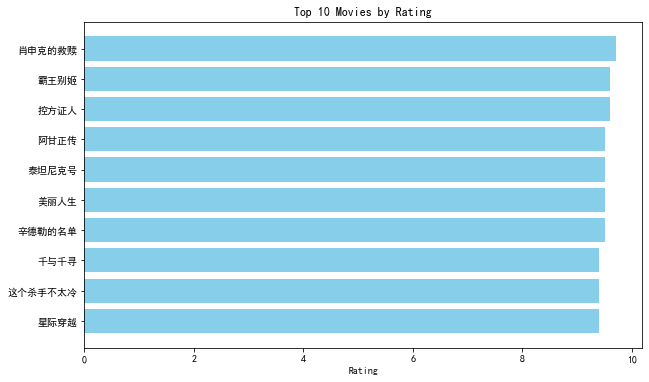

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

# 读取CSV数据
file_path = 'douban_top250.csv'  # 确保路径正确
data = pd.read_csv(file_path)

# 根据评分展示Top 10电影
top10_rating = data.nlargest(10, 'rating')  # 取评分最高的前10部电影

plt.figure(figsize=(10, 6))
plt.barh(top10_rating['title'], top10_rating['rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 10 Movies by Rating')
plt.gca().invert_yaxis()  # 翻转Y轴，使排名靠前的电影显示在顶部
plt.show()


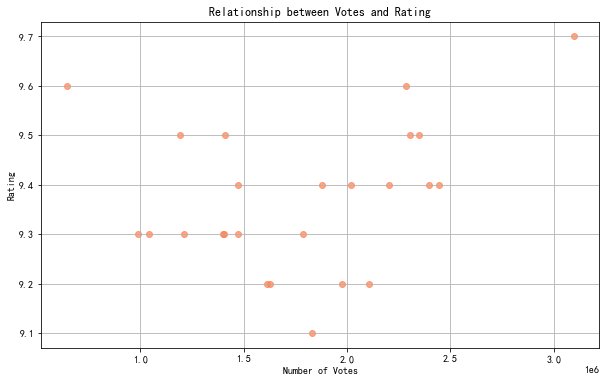

In [17]:
# 评分与投票数的散点图
plt.figure(figsize=(10, 6))
plt.scatter(data['votes'], data['rating'], alpha=0.7, color='coral')
plt.title('Relationship between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
